In [1]:
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from IPython.display import display
from sklearn import metrics
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from tools import (COLUMNS_QUANT, COLUMNS_CAT, datasets)
from kneed import KneeLocator


f3_scorer = metrics.make_scorer(metrics.fbeta_score, beta=3)
f5_scorer = metrics.make_scorer(metrics.fbeta_score, beta=5)

pd.options.display.max_rows = 80

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df.shape

(1610494, 48)

In [3]:
datasets_df = datasets(df)
X_quant_scaled = datasets_df['X_quant_scaled']
X_scaled = datasets_df['X_scaled']
y = datasets_df['y']

Columns_quant :


['contextid',
 'campaignctrlast24h',
 'dayssincelastvisitdouble',
 'ltf_nbglobaldisplay_4w',
 'ltf_nbpartnerdisplayssincelastclick',
 'ltf_nbpartnerdisplay_90d',
 'ltf_nbpartnerclick_90d',
 'ltf_nbpartnersales_90d',
 'nbdayssincelastclick',
 'nbdisplay_1hour',
 'nbdisplayglobalapprox_1d_sum_xdevice',
 'display_size',
 'zonecostineuro']


Columns_cat :


['display_env',
 'target_env',
 'campaignscenario',
 'campaignvertical',
 'is_interstitial',
 'device_type',
 'hour',
 'weekday']


Nombre de variables pour X_quant : 13



Index(['contextid', 'campaignctrlast24h', 'dayssincelastvisitdouble',
       'ltf_nbglobaldisplay_4w', 'ltf_nbpartnerdisplayssincelastclick',
       'ltf_nbpartnerdisplay_90d', 'ltf_nbpartnerclick_90d',
       'ltf_nbpartnersales_90d', 'nbdayssincelastclick', 'nbdisplay_1hour',
       'nbdisplayglobalapprox_1d_sum_xdevice', 'display_size',
       'zonecostineuro'],
      dtype='object')


Nombre de variables pour X_cat : 50



Index(['display_env_app_ios', 'display_env_other', 'display_env_web',
       'target_env_2', 'campaignscenario_5', 'campaignscenario_6',
       'campaignscenario_11', 'campaignscenario_12', 'campaignscenario_13',
       'campaignscenario_17', 'campaignvertical_20.0', 'campaignvertical_23.0',
       'campaignvertical_129.0', 'campaignvertical_200002.0',
       'is_interstitial_True', 'device_type_Desktop',
       'device_type_Desktop - Safari', 'device_type_Mobile - Other',
       'device_type_Unknown', 'device_type_iPad', 'device_type_iPhone',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')


Nombre de variables pour X : 63


## Régression logistique

L'avantage de cette méthode est qu'elle dépend du modèle utilisé.

### Méthode RFE

In [4]:
def run_RFE(model, n_features_to_select, X, y):
    # create the RFE model and select 3 attributes
    rfe = RFE(model, n_features_to_select=3)
    rfe = rfe.fit(X, y)

    # summarize the selection of the attributes
    #  print(rfe.support_)
    #  print(rfe.ranking_)

    rf_df = pd.DataFrame(rfe.ranking_,index=X.columns, columns=['Rank']).sort_values(by='Rank', ascending=True)

    display(rf_df)

In [5]:
%%time
model = LogisticRegression()
run_RFE(model, 8, X_quant_scaled, y)

,Rank
campaignctrlast24h,1
display_size,1
zonecostineuro,1
nbdisplay_1hour,2
nbdayssincelastclick,3
nbdisplayglobalapprox_1d_sum_xdevice,4
ltf_nbpartnerdisplayssincelastclick,5
ltf_nbpartnerclick_90d,6
dayssincelastvisitdouble,7
contextid,8


CPU times: user 5min 6s, sys: 14min 50s, total: 19min 56s
Wall time: 23.8 s


In [6]:
%%time
model = LogisticRegression()
run_RFE(model, 3, X_quant_scaled, y)

,Rank
campaignctrlast24h,1
display_size,1
zonecostineuro,1
nbdisplay_1hour,2
nbdayssincelastclick,3
nbdisplayglobalapprox_1d_sum_xdevice,4
ltf_nbpartnerdisplayssincelastclick,5
ltf_nbpartnerclick_90d,6
dayssincelastvisitdouble,7
contextid,8


CPU times: user 5min 6s, sys: 15min 8s, total: 20min 15s
Wall time: 24.1 s


In [7]:
%%time
model = LogisticRegression()
run_RFE(model, 2, X_quant_scaled, y)

,Rank
campaignctrlast24h,1
display_size,1
zonecostineuro,1
nbdisplay_1hour,2
nbdayssincelastclick,3
nbdisplayglobalapprox_1d_sum_xdevice,4
ltf_nbpartnerdisplayssincelastclick,5
ltf_nbpartnerclick_90d,6
dayssincelastvisitdouble,7
contextid,8


CPU times: user 5min 14s, sys: 15min 1s, total: 20min 16s
Wall time: 24 s


Pour ne pas avoir à définir un nombre de features, nous allons utiliser une méthode de Cross Validation qui permettra de calculer le nombre de features optimal.

### Méthode RFECV

In [8]:
def run_RFECV(model, X, y, score=f3_scorer, min_features_to_select=1, n_jobs=-1):

    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(5),
                  scoring=score,
                  min_features_to_select=min_features_to_select,
                  n_jobs=n_jobs)
    rfecv.fit(X, y)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel(f"Cross validation score ({str(score)})")
    x = range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select)
    y = rfecv.grid_scores_
    plt.plot(x, y)
    kneedle = KneeLocator(x, y)
    plt.vlines(kneedle.knee, plt.ylim()[0], plt.ylim()[1], linestyles="--", color='black', label="knee/elbow")
    plt.show()

    print(f"Optimal number of features (knee) : {kneedle.knee}")
    
    return kneedle.knee

#### Variables quantitatives

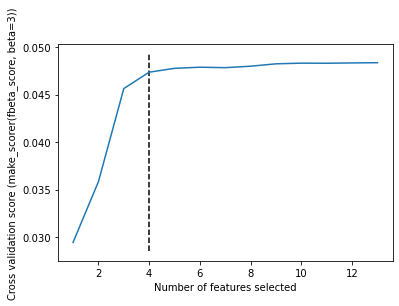

Optimal number of features (knee) : 4
CPU times: user 1min 9s, sys: 3min, total: 4min 10s
Wall time: 32.6 s


In [9]:
%%time
model = LogisticRegression()
knee = run_RFECV(model, X_quant_scaled, y, score=f3_scorer)

Le nombre de features optimal semble être 6. Nous allons donc maintenant calculer une RFE avec cette valeur pour déterminer les features à conserver.

In [10]:
%%time
model = LogisticRegression()
run_RFE(model, knee, X_quant_scaled, y)

,Rank
campaignctrlast24h,1
display_size,1
zonecostineuro,1
nbdisplay_1hour,2
nbdayssincelastclick,3
nbdisplayglobalapprox_1d_sum_xdevice,4
ltf_nbpartnerdisplayssincelastclick,5
ltf_nbpartnerclick_90d,6
dayssincelastvisitdouble,7
contextid,8


CPU times: user 5min 3s, sys: 14min 28s, total: 19min 31s
Wall time: 23.2 s


#### Variables quantitatives + catégorielles

Rajoutons à présent les variables catégorielles.

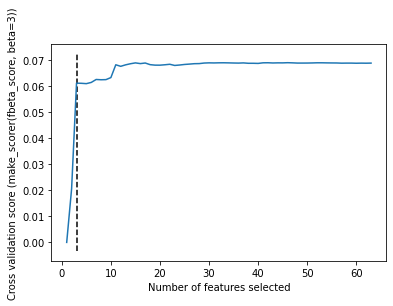

Optimal number of features (knee) : 3
CPU times: user 30min 57s, sys: 56min 36s, total: 1h 27min 34s
Wall time: 8min 59s


In [11]:
%%time
model = LogisticRegression()
knee = run_RFECV(model, X_scaled, y, score=f3_scorer)

Le nombre de features optimal semble être 11. Nous allons donc maintenant calculer une RFE avec cette valeur pour déterminer les features à conserver.

In [12]:
%%time
model = LogisticRegression()
run_RFE(model, 11, X_scaled, y)

,Rank
zonecostineuro,1
campaignctrlast24h,1
is_interstitial_True,1
nbdisplay_1hour,2
device_type_Desktop,3
device_type_iPhone,4
display_env_app_ios,5
target_env_2,6
campaignscenario_13,7
nbdayssincelastclick,8


CPU times: user 1h 6min 10s, sys: 2h 16min 29s, total: 3h 22min 39s
Wall time: 4min 59s


## Random Forest

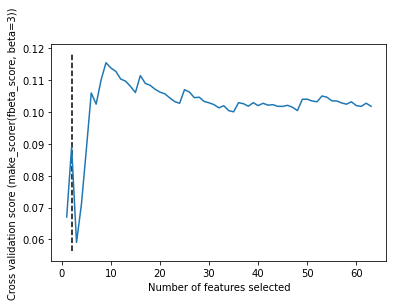

Optimal number of features (knee) : 2
CPU times: user 3d 20h 25min 47s, sys: 38min 37s, total: 3d 21h 4min 24s
Wall time: 2h 15min 33s


In [13]:
%%time
model = RandomForestClassifier(n_jobs=-1)
knee = run_RFECV(model, X_scaled, y, score=f3_scorer, n_jobs=1)

Le nombre de features optimal semble être 9. Nous allons donc maintenant calculer une RFE avec cette valeur pour déterminer les features à conserver.

In [14]:
%%time
model = RandomForestClassifier(n_jobs=-1)
run_RFE(model, 9, X_scaled, y)

,Rank
campaignctrlast24h,1
nbdisplayglobalapprox_1d_sum_xdevice,1
zonecostineuro,1
dayssincelastvisitdouble,2
display_size,3
nbdayssincelastclick,4
nbdisplay_1hour,5
is_interstitial_True,6
contextid,7
weekday_Monday,8


CPU times: user 18h 11min 53s, sys: 7min 23s, total: 18h 19min 16s
Wall time: 25min 54s


## XGBoost

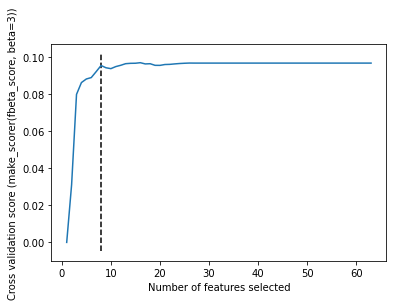

Optimal number of features (knee) : 8
CPU times: user 3d 50min 17s, sys: 25min 13s, total: 3d 1h 15min 31s
Wall time: 2h 27min 2s


In [15]:
%%time
model = XGBClassifier(n_jobs=-1)
knee = run_RFECV(model, X_scaled, y, score=f3_scorer, n_jobs=1)

In [16]:
%%time
model = XGBClassifier(n_jobs=-1)
run_RFE(model, knee, X_scaled, y)

,Rank
nbdayssincelastclick,1
zonecostineuro,1
is_interstitial_True,1
campaignctrlast24h,2
device_type_Desktop,3
nbdisplay_1hour,4
contextid,5
device_type_iPad,6
campaignscenario_13,7
campaignvertical_23.0,8


CPU times: user 13h 23min 3s, sys: 3min 17s, total: 13h 26min 21s
Wall time: 28min 5s


In [17]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 05:53:01
